# Cricket Player Performance Analysis

This notebook contains performance analysis for cricket players, categorized into batsman and bowlers. Using python and machine learning libraries, we attempt to create a player performance perdiction for future seasons.

The following approach to be completed:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement, by analyzing the stats provided, predict the performance of each player in upcoming season.

## 2. Data

The original data is taken from cricksheet, it shows the records of multiple matches ball by ball data.
https://cricsheet.org/

Yet to complete


## Importing Libraries

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import glob
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Loading Data

The record shows ball by ball data for each match and stored in different file, so we combine all the file into single dataframe.

In [40]:
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.csv'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files


In [41]:
cricket_data = get_files("D:\datasets\cricket")

In [42]:
li = []
for filename in cricket_data:
    df = pd.read_csv(filename, index_col=None, header=0, parse_dates= ["start_date"])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [43]:
frame.tail(50)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
401971,995469,2016,2016-09-09,R Premadasa Stadium,2,9.4,Australia,Sri Lanka,MS Wade,JP Faulkner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401972,995469,2016,2016-09-09,R Premadasa Stadium,2,9.5,Australia,Sri Lanka,MS Wade,JP Faulkner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401973,995469,2016,2016-09-09,R Premadasa Stadium,2,9.6,Australia,Sri Lanka,JP Faulkner,MS Wade,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401974,995469,2016,2016-09-09,R Premadasa Stadium,2,10.1,Australia,Sri Lanka,MS Wade,JP Faulkner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401975,995469,2016,2016-09-09,R Premadasa Stadium,2,10.2,Australia,Sri Lanka,MS Wade,JP Faulkner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401976,995469,2016,2016-09-09,R Premadasa Stadium,2,10.3,Australia,Sri Lanka,MS Wade,JP Faulkner,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401977,995469,2016,2016-09-09,R Premadasa Stadium,2,10.4,Australia,Sri Lanka,MS Wade,JP Faulkner,...,0,NaN,NaN,NaN,NaN,NaN,run out,JP Faulkner,NaN,NaN
401978,995469,2016,2016-09-09,R Premadasa Stadium,2,10.5,Australia,Sri Lanka,UT Khawaja,MS Wade,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401979,995469,2016,2016-09-09,R Premadasa Stadium,2,10.6,Australia,Sri Lanka,UT Khawaja,MS Wade,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401980,995469,2016,2016-09-09,R Premadasa Stadium,2,11.1,Australia,Sri Lanka,MS Wade,UT Khawaja,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
frame.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [45]:
frame.T

,0,1,2,3,4,5,6,7,8,9,...,402011,402012,402013,402014,402015,402016,402017,402018,402019,402020
match_id,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,...,995469,995469,995469,995469,995469,995469,995469,995469,995469,995469
season,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
start_date,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,...,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00
venue,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,...,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium
innings,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
ball,0.1,0.2,0.3,0.4,0.5,0.6,1.1,1.2,1.3,1.4,...,16.2,16.3,16.4,16.5,16.6,17.1,17.2,17.3,17.4,17.5
batting_team,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
bowling_team,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,...,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka
striker,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch,...,MS Wade,TM Head,TM Head,MS Wade,MS Wade,TM Head,PM Nevill,TM Head,TM Head,TM Head
non_striker,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger,...,TM Head,MS Wade,MS Wade,TM Head,TM Head,PM Nevill,TM Head,PM Nevill,PM Nevill,PM Nevill


In [46]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   match_id                402021 non-null  int64         
 1   season                  402021 non-null  object        
 2   start_date              402021 non-null  datetime64[ns]
 3   venue                   402021 non-null  object        
 4   innings                 402021 non-null  int64         
 5   ball                    402021 non-null  float64       
 6   batting_team            402021 non-null  object        
 7   bowling_team            402021 non-null  object        
 8   striker                 402021 non-null  object        
 9   non_striker             402021 non-null  object        
 10  bowler                  402021 non-null  object        
 11  runs_off_bat            402021 non-null  int64         
 12  extras                  402021

In [47]:
frame["wicket_type"].unique()

array([nan, 'caught', 'run out', 'stumped', 'lbw', 'caught and bowled',
       'bowled', 'retired hurt', 'obstructing the field', 'hit wicket',
       'retired out', 'retired not out'], dtype=object)

In [48]:
frame["player_dismissed"].unique()

array([nan, 'M Klinger', 'AJ Finch', ..., 'Hafiz Qaleem', 'Farhan Ahmed',
       'Qadeer Ahmed'], dtype=object)

In [49]:
frame.wides.unique(), frame.noballs.unique(), frame.byes.unique(), frame.legbyes.unique()

(array([nan,  1.,  5.,  2.,  3.,  4.]),
 array([nan,  1.,  2.,  5.,  3.]),
 array([nan,  1.,  4.,  2.,  3.,  5.]),
 array([nan,  1.,  4.,  2.,  3.,  5.]))

In [50]:
#fill the empty values for missing columns
cat_feature = ["wicket_type", "player_dismissed"]
num_feature = ["wides", "noballs", "byes", "legbyes"]

# define imputer
cat_imputer = SimpleImputer(strategy= "constant", fill_value= "No Wicket")
num_imputer = SimpleImputer(strategy= "constant", fill_value= 0)

# filling value using column transformer

transform = ColumnTransformer([("cat_imputer" , cat_imputer, cat_feature), ("num_imputer", num_imputer,
                                                                          num_feature)])
transformer = transform.fit_transform(frame)
transformer

array([['No Wicket', 'No Wicket', 0.0, 0.0, 0.0, 0.0],
       ['No Wicket', 'No Wicket', 0.0, 0.0, 0.0, 0.0],
       ['No Wicket', 'No Wicket', 0.0, 0.0, 0.0, 0.0],
       ...,
       ['No Wicket', 'No Wicket', 0.0, 0.0, 0.0, 0.0],
       ['No Wicket', 'No Wicket', 0.0, 0.0, 0.0, 0.0],
       ['No Wicket', 'No Wicket', 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [51]:
filled_frame = pd.DataFrame(transformer, columns= ["wicket_type", "player_dismissed", "wides", "noballs", 
                                             "byes", "legbyes"])

In [52]:
filled_frame[["wides", "noballs", "byes", "legbyes"]] = filled_frame[["wides", "noballs", "byes", "legbyes"]].astype(int)

In [53]:
frame[["wicket_type", "player_dismissed", "wides", "noballs", "byes", "legbyes"]] = filled_frame

In [54]:
frame.T

,0,1,2,3,4,5,6,7,8,9,...,402011,402012,402013,402014,402015,402016,402017,402018,402019,402020
match_id,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,...,995469,995469,995469,995469,995469,995469,995469,995469,995469,995469
season,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
start_date,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,...,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00
venue,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,...,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium
innings,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
ball,0.1,0.2,0.3,0.4,0.5,0.6,1.1,1.2,1.3,1.4,...,16.2,16.3,16.4,16.5,16.6,17.1,17.2,17.3,17.4,17.5
batting_team,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
bowling_team,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,...,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka
striker,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch,...,MS Wade,TM Head,TM Head,MS Wade,MS Wade,TM Head,PM Nevill,TM Head,TM Head,TM Head
non_striker,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger,...,TM Head,MS Wade,MS Wade,TM Head,TM Head,PM Nevill,TM Head,PM Nevill,PM Nevill,PM Nevill


In [55]:
frame.isna().sum()

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                          0
noballs                        0
byes                           0
legbyes                        0
penalty                   402014
wicket_type                    0
player_dismissed               0
other_wicket_type         402021
other_player_dismissed    402021
dtype: int64

In [56]:
frame.drop(["other_wicket_type", "other_player_dismissed", "penalty"], axis = 1, inplace = True)

In [57]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          402021 non-null  int64         
 1   season            402021 non-null  object        
 2   start_date        402021 non-null  datetime64[ns]
 3   venue             402021 non-null  object        
 4   innings           402021 non-null  int64         
 5   ball              402021 non-null  float64       
 6   batting_team      402021 non-null  object        
 7   bowling_team      402021 non-null  object        
 8   striker           402021 non-null  object        
 9   non_striker       402021 non-null  object        
 10  bowler            402021 non-null  object        
 11  runs_off_bat      402021 non-null  int64         
 12  extras            402021 non-null  int64         
 13  wides             402021 non-null  int32         
 14  noba

In [58]:
cor_matrix = frame.corr(numeric_only= True)
cor_matrix

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes
match_id,1.000000,-0.008172,-0.008609,-0.010326,0.007173,0.014613,-0.002542,0.006912,-0.011083
innings,-0.008172,1.000000,-0.067954,-0.013016,-0.001112,0.000527,-0.000520,-0.002486,-0.000938
ball,-0.008609,-0.067954,1.000000,0.070165,-0.005068,-0.014581,0.009715,0.015969,-0.004498
runs_off_bat,-0.010326,-0.013016,0.070165,1.000000,-0.143440,-0.118474,0.005043,-0.037812,-0.079536
extras,0.007173,-0.001112,-0.005068,-0.143440,1.000000,0.727636,0.201767,0.379714,0.512682
wides,0.014613,0.000527,-0.014581,-0.118474,0.727636,1.000000,-0.010099,-0.008186,-0.017219
noballs,-0.002542,-0.000520,0.009715,0.005043,0.201767,-0.010099,1.000000,0.027654,-0.003475
byes,0.006912,-0.002486,0.015969,-0.037812,0.379714,-0.008186,0.027654,1.000000,-0.005495
legbyes,-0.011083,-0.000938,-0.004498,-0.079536,0.512682,-0.017219,-0.003475,-0.005495,1.000000


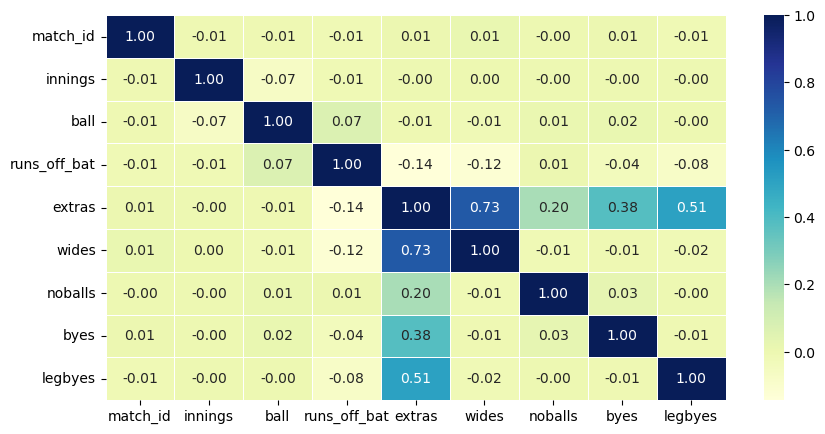

In [59]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.heatmap(cor_matrix, annot= True, cmap = "YlGnBu", linewidths= 0.5, fmt = ".2f");

In [60]:
frame.player_dismissed.unique()

array(['No Wicket', 'M Klinger', 'AJ Finch', ..., 'Hafiz Qaleem',
       'Farhan Ahmed', 'Qadeer Ahmed'], dtype=object)

In [61]:
ref_label = np.array(frame.player_dismissed)
player_status = []
for i in ref_label:
    if i == "No Wicket":
        player_status.append(0)
    else:
        player_status.append(1)
player_status


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [62]:
frame["player_status"] = player_status

In [63]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          402021 non-null  int64         
 1   season            402021 non-null  object        
 2   start_date        402021 non-null  datetime64[ns]
 3   venue             402021 non-null  object        
 4   innings           402021 non-null  int64         
 5   ball              402021 non-null  float64       
 6   batting_team      402021 non-null  object        
 7   bowling_team      402021 non-null  object        
 8   striker           402021 non-null  object        
 9   non_striker       402021 non-null  object        
 10  bowler            402021 non-null  object        
 11  runs_off_bat      402021 non-null  int64         
 12  extras            402021 non-null  int64         
 13  wides             402021 non-null  int32         
 14  noba

In [64]:
# find all the object column
for label, content in frame.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

season
venue
batting_team
bowling_team
striker
non_striker
bowler
wicket_type
player_dismissed


In [65]:
# convert into categorical
for label, content in frame.items():
    if pd.api.types.is_string_dtype(content):
        frame[label] = content.astype("category").cat.as_ordered()

In [66]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          402021 non-null  int64         
 1   season            402021 non-null  category      
 2   start_date        402021 non-null  datetime64[ns]
 3   venue             402021 non-null  category      
 4   innings           402021 non-null  int64         
 5   ball              402021 non-null  float64       
 6   batting_team      402021 non-null  category      
 7   bowling_team      402021 non-null  category      
 8   striker           402021 non-null  category      
 9   non_striker       402021 non-null  category      
 10  bowler            402021 non-null  category      
 11  runs_off_bat      402021 non-null  int64         
 12  extras            402021 non-null  int64         
 13  wides             402021 non-null  int32         
 14  noba

In [90]:
cat_dict = {}

for label, content in frame.items():
    if pd.api.types.is_categorical_dtype(content):
        cat_dict[label] = frame[label].cat.codes

In [93]:
cat_frame = pd.DataFrame(cat_dict)
frame[["season", "venue", "batting_team", "bowling_team", "striker", "non_striker", "bowler", "wicket_type", "player_dismissed"]] = cat_frame

In [95]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          402021 non-null  int64         
 1   season            402021 non-null  int8          
 2   start_date        402021 non-null  datetime64[ns]
 3   venue             402021 non-null  int16         
 4   innings           402021 non-null  int64         
 5   ball              402021 non-null  float64       
 6   batting_team      402021 non-null  int8          
 7   bowling_team      402021 non-null  int8          
 8   striker           402021 non-null  int16         
 9   non_striker       402021 non-null  int16         
 10  bowler            402021 non-null  int16         
 11  runs_off_bat      402021 non-null  int64         
 12  extras            402021 non-null  int64         
 13  wides             402021 non-null  int32         
 14  noba

In [96]:
X = frame.drop(["player_status", "player_dismissed", "wicket_type", "start_date"], axis = 1)
y = frame["player_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.size, y_train.size

(5145856, 321616)

In [97]:
models = {"LogisticRegression" : LogisticRegression(),
        "RandomForest": RandomForestClassifier()}

def model_func(X_train, y_train, X_test, y_test):
    
    model_score = {}
    for name, model in models.items():
        
        np.random.seed(seed = 40)
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
        
    return model_score    

In [98]:
model_func(X_train, y_train, X_test, y_test)

D:\job\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.946309309122567, 'RandomForest': 0.9328275604750949}